### Importing libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Loading Data sets

In [2]:
#loading datasets
uber_request_data = pd.read_csv("UberRequestData.csv")

### Summary of data sets

In [3]:
print(uber_request_data.info())
print('\nshape of the uber dataset:')
print(uber_request_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None

shape of the uber dataset:
(6745, 6)


In [4]:
#Diplaying top few datasets

uber_request_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


## 1. Data Cleaning and preparation

### 1.1: Sinking the data and time format
We can see the presence of different date and time format in the uber_request_data file in columns(`Request timestamp and Drop timestamp`). These are changed by using datetime function.

In [5]:
#We can see date and time present in different format.
#Changing the data time with standard format i.e. YYYY-MM-DD %HH:%MM:%SS
uber_request_data['Request timestamp'] = pd.to_datetime(uber_request_data['Request timestamp'])
uber_request_data['Drop timestamp'] = pd.to_datetime(uber_request_data['Drop timestamp'])
uber_request_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


### __1.2 : Duplicate and Null value percentages__


#### 1.2.1 Duplicate values in uber_request_data file
There are __`6745`__ uber_request_data present with no value repeating more than once(no duplicates). 

In [6]:
#check for duplicate rows based on permalink
print('number of duplicate records')
print(uber_request_data.duplicated(['Request id']).sum())
#no duplicate rows meaning no repetitive companies.Therefore number of 
#unique companies is equal to number of rows which is 66368
print('\nNumber of Unique companies in Companies data file')
print(len(uber_request_data['Request id'].unique()))



number of duplicate records
0

Number of Unique companies in Companies data file
6745


#### 1.2.2 :Null values percentage

We can  see that presence of null values in `Driver id` and `Drop timestamp` column.

In [7]:
#check for null columns 
print(round(100*uber_request_data.isnull().sum()/len(uber_request_data)),2)
#As we can see `Driver id` and `Drop timestamp` hold the null values.
#Null values can be replaced by '0' , 'None' or can be deleted. As we will be using these columns later so deletion option will be omitted
#Replacing with 'None' will be good option as in using '0' results in change in mean ... values.
uber_request_data = uber_request_data.fillna("None")
print("After replacing:")
print(round(100*uber_request_data.isnull().sum()/len(uber_request_data)),2)

Request id            0.0
Pickup point          0.0
Driver id            39.0
Status                0.0
Request timestamp     0.0
Drop timestamp       58.0
dtype: float64 2
After replacing:
Request id           0.0
Pickup point         0.0
Driver id            0.0
Status               0.0
Request timestamp    0.0
Drop timestamp       0.0
dtype: float64 2


##  2 : Visually identify the most pressing problems for Uber

As we have seen as challenge while booking a uber cab to and fro from city and Airport.
Many times the driver either cancelled the booking or show no car available.

### 2.1 : visualise the frequency of requests that get cancelled or show no cars available

In this case, we try to analyse the frequency or count of cabs status i.e. cancelled, no car available or trip completed

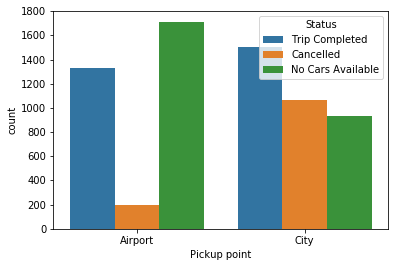

In [8]:
#Here, a count plot can be thought of as a histogram across a categorical, instead of quantitative variable.
# countplot will help in plotting the graph considering count on the y axis.
#`x` denotes the column to be taken on x axis i.e. pickup point and hue is also the name of a variable or input for plotting the graph

sns.countplot(x='Pickup point', hue='Status', data=uber_request_data)

The most problematic types of request is from City to Airport as we can see through above graph that count of `No Cars Available` from airport to city is near around 1700 which is far greater than that off city to Airport i.e 900.
Also the count of `Trip Completed` from Airport is 1300 which is less than that off city i.e. 1500 (approx).
And for `cancelled`, the count is 200 for Airport and 1100 for city.

Cancelled + No car available = 1700 + 200 = 1900(Airport)
Cancelled + No car available = 1000 + 1100 = 2000(City)

As the `Cancelled + No car available` count is higher for city than airport hence city to airport is the problematic request

### 2.2 : Identifying the timeslots
In this we try to analyse the part of day where the uber requests mostly occur. So we divided the 24 hour day time into different slots : Early Morning, Morning, Afternoon, Evening, Late Evening and Night

In [9]:
##Fetch the time present in the request timestamp column using datetime library
##Store the time fetched into new column i.e. Request_Time
uber_request_data['Request_Time'] = uber_request_data['Request timestamp'].dt.time
uber_request_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Time
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11:51:00
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,09:17:00
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16


In [10]:
# Dividing the timestamps into different timeslots using 'strptime' function of datetime library
#Alloting the timeslots to the requested time so that categorization can be easy.
uber_request_data['Timeslots'] = uber_request_data['Request_Time'].apply(lambda x: "Early Morning" if x <=datetime.datetime.strptime('06:00:00', "%H:%M:%S").time()
                                     else ("Morning" if x <= datetime.datetime.strptime('11:00:00', "%H:%M:%S").time()
                                   else ("Aftnoon" if x <= datetime.datetime.strptime('15:00:00', "%H:%M:%S").time()
                                    else ("Evening" if x <= datetime.datetime.strptime('19:00:00', "%H:%M:%S").time()
                                    else("Late Evening" if x <= datetime.datetime.strptime('21:00:00', "%H:%M:%S").time()
                                    else("Night" if x <= datetime.datetime.strptime('23:59:59', "%H:%M:%S").time()

                                   else "default"))))))
uber_request_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Time,Timeslots
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11:51:00,Aftnoon
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00,Evening
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,09:17:00,Morning
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,Morning


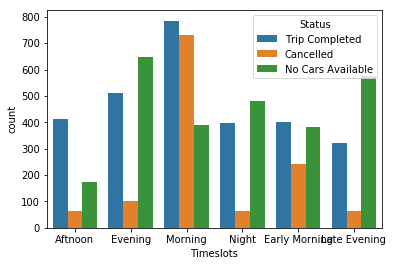

In [11]:
# creating a plot with status and  timeslots
sns.countplot(x='Timeslots', hue = 'Status', data=uber_request_data)

In the above plot, we can see that as per the time slots defined the frequesncy of the status i.e. can cancelled, trip completed and No cars available. As in the morning the count of cancelled and trip completed is max than rest of the day. Hence we can say that in this duration of day, the demand and supply is high

## 3 : Finding gap between supply and demand

### 3.1 : Creating new dataframe with supply and demand inputs

Supply is defined as the total number of request or trip completed whereas Demand hold all the values whether cancelled, no car available or completed.
We create new dataframe from the original with status, timeslots and the count

In [12]:
# Crosstab compute a simple cross-tabulation of two (or more) factors. 
# By default computes a frequency table of the factors unless an array of values and an aggregation function are passed
# A table gets created with the count values of the status along that particular timeslots
uber_request_data_1 = pd.crosstab(uber_request_data['Timeslots'], uber_request_data['Status'])
uber_request_data_1

Status,Cancelled,No Cars Available,Trip Completed
Timeslots,,,
Aftnoon,63,174,414
Early Morning,241,383,400
Evening,102,649,510
Late Evening,65,575,323
Morning,729,388,785
Night,64,481,399


In [13]:
#In this supply will be equal to the total number of trip completed.
#Demand will be the sum of cancelled, no cars available and trip completed
#Gap will be the difference of demand and supply.
# All these above terms are analysed and added as a column into the dataframe
uber_request_data_1['Total Supply'] = uber_request_data_1['Trip Completed']
uber_request_data_1['Total Demand'] = uber_request_data_1['Cancelled'] + uber_request_data_1['No Cars Available'] + uber_request_data_1['Trip Completed']
uber_request_data_1['Gap'] = uber_request_data_1['Total Demand'] - uber_request_data_1['Total Supply']
uber_request_data_1

Status,Cancelled,No Cars Available,Trip Completed,Total Supply,Total Demand,Gap
Timeslots,,,,,,
Aftnoon,63,174,414,414,651,237
Early Morning,241,383,400,400,1024,624
Evening,102,649,510,510,1261,751
Late Evening,65,575,323,323,963,640
Morning,729,388,785,785,1902,1117
Night,64,481,399,399,944,545


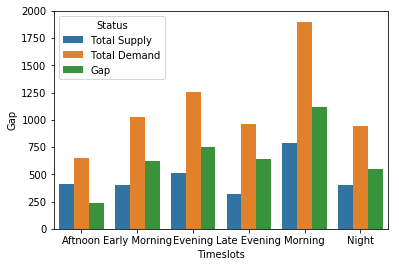

In [14]:
#We will drop all the irrelevant columns to get the required plots
#Provie the name to the index of the table to plot
uber_request_data_1 = uber_request_data_1.drop(['Cancelled', 'No Cars Available', 'Trip Completed'], axis = 1) 

stacked = uber_request_data_1.stack().reset_index().rename(columns={0:'Gap'})
sns.barplot(x=stacked.Timeslots, y=stacked.Gap, hue = stacked.Status)

The timeslot when the highest GAP exists is the "MORNING" i.e. between 6AM to 11AM as we can see that the bar of Gap on morning is max then the rest.
Also the demand is high than supply which results into the max Gap

### 3.2 :  Types of requests (city-airport or airport-city) for which the gap is the most severe

In [15]:
##Show the total count of the request Status along the pickup point
## Here we can see that the rcount of request cancelled from city is more than that of airport
uber_request_data_2 = pd.crosstab(uber_request_data['Pickup point'], uber_request_data['Status'])
uber_request_data_2

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


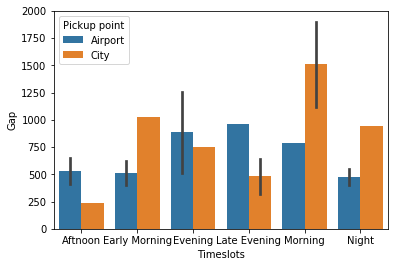

In [16]:
#creating a plot between Timeslots, Gap and picup point
sns.barplot(x=stacked.Timeslots, y=stacked.Gap, hue = uber_request_data['Pickup point'])

The type of request for which the Gap is most severe as per the timeslots is "City to Airport".
As the value of Gap is high in morning for city rather than Airport